In [1]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
path= '/gdrive/My Drive/Lemalabs/Assignments/data/'
train_data= pd.read_csv(path + 'Chennai_house_price_multivariate_train.csv')
test_data = pd.read_csv(path + 'Chennai_house_price_multivariate_test.csv')

In [4]:
train_data.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,15-05-1967,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,22-12-1995,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,09-02-1992,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,18-03-1988,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,13-10-1979,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


In [5]:
train_data.tail()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
7104,P03834,Karapakkam,598,03-01-2011,51,1.0,1.0,2,AdjLand,No,15-01-1962,Others,ELO,No Access,RM,3.0,2.2,2.4,2.52,208767,107060,5353000
7105,P10000,Velachery,1897,08-04-2004,52,3.0,2.0,5,Family,Yes,11-04-1995,Others,NoSeWa,No Access,RH,3.6,4.5,3.3,3.92,346191,205551,10818480
7106,P09594,Velachery,1614,25-08-2006,152,2.0,1.0,4,Normal Sale,No,01-09-1978,House,NoSeWa,Gravel,I,4.3,4.2,2.9,3.84,317354,167028,8351410
7107,P06508,Karapakkam,787,03-08-2009,40,1.0,1.0,2,Partial,Yes,11-08-1977,Commercial,ELO,Paved,RL,4.6,3.8,4.1,4.16,425350,119098,8507000
7108,P09794,Velachery,1896,13-07-2005,156,3.0,2.0,5,Partial,Yes,24-07-1961,Others,ELO,Paved,I,3.1,3.5,4.3,3.64,349177,79812,9976480


In [6]:
train_data.isnull().sum(axis=0)

PRT_ID            0
AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
REG_FEE           0
COMMIS            0
SALES_PRICE       0
dtype: int64

In [7]:
train_data = train_data.fillna({'N_BEDROOM' : train_data['N_BEDROOM'].mean(),'N_BATHROOM' : train_data['N_BATHROOM'].mean(),'QS_OVERALL' : train_data['QS_OVERALL'].mean()})

In [8]:
train_data.isnull().sum(axis=0)

PRT_ID           0
AREA             0
INT_SQFT         0
DATE_SALE        0
DIST_MAINROAD    0
N_BEDROOM        0
N_BATHROOM       0
N_ROOM           0
SALE_COND        0
PARK_FACIL       0
DATE_BUILD       0
BUILDTYPE        0
UTILITY_AVAIL    0
STREET           0
MZZONE           0
QS_ROOMS         0
QS_BATHROOM      0
QS_BEDROOM       0
QS_OVERALL       0
REG_FEE          0
COMMIS           0
SALES_PRICE      0
dtype: int64

In [9]:
train_data.shape

(7109, 22)

In [10]:
output = train_data['SALES_PRICE']
output = np.array(output)
output = output.reshape(-1,1)
output.shape

(7109, 1)

In [11]:
training_input = train_data.drop(columns = ['PRT_ID','DATE_SALE','SALES_PRICE', 'DATE_BUILD'])
training_input.head()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS
0,Karapakkam,1004,131,1.0,1.0,3,AbNormal,Yes,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400
1,Anna Nagar,1986,26,2.0,1.0,5,AbNormal,No,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049
2,Adyar,909,70,1.0,1.0,3,AbNormal,Yes,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114
3,Velachery,1855,14,3.0,2.0,5,Family,No,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042
4,Karapakkam,1226,84,1.0,1.0,3,AbNormal,Yes,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063


In [12]:
training_input.tail()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS
7104,Karapakkam,598,51,1.0,1.0,2,AdjLand,No,Others,ELO,No Access,RM,3.0,2.2,2.4,2.52,208767,107060
7105,Velachery,1897,52,3.0,2.0,5,Family,Yes,Others,NoSeWa,No Access,RH,3.6,4.5,3.3,3.92,346191,205551
7106,Velachery,1614,152,2.0,1.0,4,Normal Sale,No,House,NoSeWa,Gravel,I,4.3,4.2,2.9,3.84,317354,167028
7107,Karapakkam,787,40,1.0,1.0,2,Partial,Yes,Commercial,ELO,Paved,RL,4.6,3.8,4.1,4.16,425350,119098
7108,Velachery,1896,156,3.0,2.0,5,Partial,Yes,Others,ELO,Paved,I,3.1,3.5,4.3,3.64,349177,79812


In [13]:
from sklearn.preprocessing import LabelEncoder

area_labelencoder = LabelEncoder()
training_input["AREA"] = area_labelencoder.fit_transform(training_input["AREA"])

salcond_labelencoder = LabelEncoder()
training_input["SALE_COND"] = salcond_labelencoder.fit_transform(training_input["SALE_COND"])

park_labelencoder = LabelEncoder()
training_input["PARK_FACIL"] = park_labelencoder.fit_transform(training_input["PARK_FACIL"])

btype_labelencoder = LabelEncoder()
training_input["BUILDTYPE"] = btype_labelencoder.fit_transform(training_input["BUILDTYPE"])

uavail_labelencoder = LabelEncoder()
training_input["UTILITY_AVAIL"] = uavail_labelencoder.fit_transform(training_input["UTILITY_AVAIL"])

street_labelencoder = LabelEncoder()
training_input["STREET"] = street_labelencoder.fit_transform(training_input["STREET"])

mzzone_labelencoder = LabelEncoder()
training_input["MZZONE"] = mzzone_labelencoder.fit_transform(training_input["MZZONE"])

In [14]:
training_input.head()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS
0,12,1004,131,1.0,1.0,3,1,2,0,1,4,0,4.0,3.9,4.9,4.330,380000,144400
1,4,1986,26,2.0,1.0,5,1,0,0,1,0,3,4.9,4.2,2.5,3.765,760122,304049
2,0,909,70,1.0,1.0,3,1,2,0,2,0,4,4.1,3.8,2.2,3.090,421094,92114
3,15,1855,14,3.0,2.0,5,4,0,2,4,4,2,4.7,3.9,3.6,4.010,356321,77042
4,12,1226,84,1.0,1.0,3,1,2,2,1,0,1,3.0,2.5,4.1,3.290,237000,74063


In [15]:
training_input.tail()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS
7104,12,598,51,1.0,1.0,2,3,0,2,2,1,5,3.0,2.2,2.4,2.52,208767,107060
7105,15,1897,52,3.0,2.0,5,4,2,2,3,1,3,3.6,4.5,3.3,3.92,346191,205551
7106,15,1614,152,2.0,1.0,4,5,0,1,3,0,2,4.3,4.2,2.9,3.84,317354,167028
7107,12,787,40,1.0,1.0,2,7,2,0,2,4,4,4.6,3.8,4.1,4.16,425350,119098
7108,15,1896,156,3.0,2.0,5,7,2,2,2,4,2,3.1,3.5,4.3,3.64,349177,79812


In [16]:
training_input.shape, output.shape

((7109, 18), (7109, 1))

In [17]:
fsdata=(training_input-training_input.mean())/(training_input.max()-training_input.min())
fsoutput= (output-output.mean())/(output.max()-output.min())

In [18]:
fsdata.head()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS
0,0.208011,-0.189037,0.156984,-0.212343,-0.21326,-0.172176,-0.375721,0.495288,-0.500492,-0.378042,0.56745,-0.663469,0.160843,0.130919,0.471567,0.278366,0.003354,0.006922
1,-0.291989,0.301963,-0.368016,0.120990,-0.21326,0.327824,-0.375721,-0.504712,-0.500492,-0.378042,-0.43255,-0.063469,0.460843,0.230919,-0.328433,0.088130,0.419815,0.332504
2,-0.541989,-0.236537,-0.148016,-0.212343,-0.21326,-0.172176,-0.375721,0.495288,-0.500492,-0.128042,-0.43255,0.136531,0.194176,0.097585,-0.428433,-0.139143,0.048377,-0.099708
3,0.395511,0.236463,-0.428016,0.454324,0.78674,0.327824,-0.000721,-0.504712,0.499508,0.371958,0.56745,-0.263469,0.394176,0.130919,0.038233,0.170622,-0.022588,-0.130445
4,0.208011,-0.078037,-0.078016,-0.212343,-0.21326,-0.172176,-0.375721,0.495288,0.499508,-0.378042,-0.43255,-0.463469,-0.172490,-0.335748,0.204900,-0.071803,-0.153316,-0.136520


In [19]:
fsdata.tail()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS
7104,0.208011,-0.392037,-0.243016,-0.212343,-0.21326,-0.422176,-0.125721,-0.504712,0.499508,-0.128042,-0.18255,0.336531,-0.172490,-0.435748,-0.361767,-0.331062,-0.184248,-0.069228
7105,0.395511,0.257463,-0.238016,0.454324,0.78674,0.327824,-0.000721,0.495288,0.499508,0.121958,-0.18255,-0.063469,0.027510,0.330919,-0.061767,0.140319,-0.033687,0.131631
7106,0.395511,0.115963,0.261984,0.120990,-0.21326,0.077824,0.124279,-0.504712,-0.000492,0.121958,-0.43255,-0.263469,0.260843,0.230919,-0.195100,0.113383,-0.065280,0.053069
7107,0.208011,-0.297537,-0.298016,-0.212343,-0.21326,-0.422176,0.374279,0.495288,-0.500492,-0.128042,0.56745,0.136531,0.360843,0.097585,0.204900,0.221127,0.053040,-0.044678
7108,0.395511,0.256963,0.281984,0.454324,0.78674,0.327824,0.374279,0.495288,0.499508,-0.128042,0.56745,-0.263469,-0.139157,-0.002415,0.271567,0.046042,-0.030415,-0.124796


In [20]:
x= fsdata
y= fsoutput

In [21]:
x.insert(0,'Bias',1)

In [22]:
x.head()

,Bias,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS
0,1,0.208011,-0.189037,0.156984,-0.212343,-0.21326,-0.172176,-0.375721,0.495288,-0.500492,-0.378042,0.56745,-0.663469,0.160843,0.130919,0.471567,0.278366,0.003354,0.006922
1,1,-0.291989,0.301963,-0.368016,0.120990,-0.21326,0.327824,-0.375721,-0.504712,-0.500492,-0.378042,-0.43255,-0.063469,0.460843,0.230919,-0.328433,0.088130,0.419815,0.332504
2,1,-0.541989,-0.236537,-0.148016,-0.212343,-0.21326,-0.172176,-0.375721,0.495288,-0.500492,-0.128042,-0.43255,0.136531,0.194176,0.097585,-0.428433,-0.139143,0.048377,-0.099708
3,1,0.395511,0.236463,-0.428016,0.454324,0.78674,0.327824,-0.000721,-0.504712,0.499508,0.371958,0.56745,-0.263469,0.394176,0.130919,0.038233,0.170622,-0.022588,-0.130445
4,1,0.208011,-0.078037,-0.078016,-0.212343,-0.21326,-0.172176,-0.375721,0.495288,0.499508,-0.378042,-0.43255,-0.463469,-0.172490,-0.335748,0.204900,-0.071803,-0.153316,-0.136520


In [23]:
x.tail()

,Bias,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS
7104,1,0.208011,-0.392037,-0.243016,-0.212343,-0.21326,-0.422176,-0.125721,-0.504712,0.499508,-0.128042,-0.18255,0.336531,-0.172490,-0.435748,-0.361767,-0.331062,-0.184248,-0.069228
7105,1,0.395511,0.257463,-0.238016,0.454324,0.78674,0.327824,-0.000721,0.495288,0.499508,0.121958,-0.18255,-0.063469,0.027510,0.330919,-0.061767,0.140319,-0.033687,0.131631
7106,1,0.395511,0.115963,0.261984,0.120990,-0.21326,0.077824,0.124279,-0.504712,-0.000492,0.121958,-0.43255,-0.263469,0.260843,0.230919,-0.195100,0.113383,-0.065280,0.053069
7107,1,0.208011,-0.297537,-0.298016,-0.212343,-0.21326,-0.422176,0.374279,0.495288,-0.500492,-0.128042,0.56745,0.136531,0.360843,0.097585,0.204900,0.221127,0.053040,-0.044678
7108,1,0.395511,0.256963,0.281984,0.454324,0.78674,0.327824,0.374279,0.495288,0.499508,-0.128042,0.56745,-0.263469,-0.139157,-0.002415,0.271567,0.046042,-0.030415,-0.124796


In [24]:
x.shape, y.shape

((7109, 19), (7109, 1))

In [25]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [26]:
x_train = np.matrix(x_train)
y_train = np.matrix(y_train)

In [27]:
theta = np.matrix(np.zeros(19))

In [28]:
theta.shape, x_train.shape, y_train.shape, x_test.shape, y_test.shape

((1, 19), (5331, 19), (5331, 1), (1778, 19), (1778, 1))

In [29]:
def computeError(x,y,theta):
  inner = np.power(((x*theta.T)-y),2)
  return np.sum(inner)/(2*len(x))

In [30]:
computeError(x_train,y_train,theta)

0.01514775624202934

In [31]:
learning_rate = 0.1
iterations = 50000
def gradientDescent(x,y,theta,learning_rate,iterations):
  mt = np.matrix(np.zeros(theta.shape))   
  parameters = theta.shape[1]        
  cost = []            

  for i in range(iterations):      
    error = (x*theta.T)-y     

    for j in range(parameters): 
      gradient = np.multiply(error,x[:,j])
      mt[0,j]= theta[0,j] - ((learning_rate/len(x))*np.sum(gradient))      

    theta= mt   
    
    cost_iter = computeError(x,y,theta) 

    cost.append(cost_iter) 
    
  return theta,cost

In [32]:
new_theta,cost = gradientDescent(x_train,y_train,theta,learning_rate,iterations)

In [33]:
print(new_theta)

[[-0.00061045 -0.05860381  0.07054762  0.00216739 -0.1715919  -0.04859954
   0.3107037  -0.01409807  0.02257768 -0.09076019 -0.00616828 -0.00838017
   0.0878628  -0.00378037 -0.01629858 -0.01064964  0.04158974  0.55486038
   0.06957275]]


In [34]:
print(cost)

[0.014748418920141807, 0.014365208660398917, 0.013997360743574126, 0.013644150364551294, 0.013304890429881243, 0.012978929480867514, 0.012665649734874244, 0.012364465237983102, 0.012074820122533683, 0.011796186963464225, 0.011528065227728538, 0.011269979811402452, 0.011021479659410091, 0.010782136463098071, 0.010551543431165851, 0.010329314129723733, 0.010115081387497591, 0.009908496262432242, 0.00970922706616448, 0.00951695844304272, 0.009331390500564158, 0.009152237988282668, 0.008979229522412317, 0.00881210685351286, 0.008650624174795568, 0.008494547468730842, 0.008343653889773553, 0.008197731181148995, 0.008056577123761396, 0.007919999015399363, 0.007787813178518309, 0.0076598444949793915, 0.007535925966218192, 0.007415898297404601, 0.007299609504238352, 0.007186914541102911, 0.007077674949373979, 0.006971758524748262, 0.006869039002523374, 0.006769395759821274, 0.006672713533805445, 0.006578882154996675, 0.006487796294843448, 0.006399355226751528, 0.006313462599822667, 0.006230026

No handles with labels found to put in legend.


Text(0.5, 1.0, 'Error Vs Iterations')

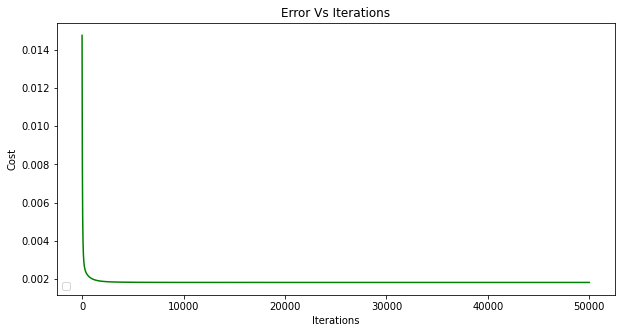

In [35]:
fig,ax = plt.subplots(figsize=(10,5))
ax.plot(np.arange(iterations),cost,'g')
ax.legend(loc=3)
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error Vs Iterations')

In [36]:
training_model=  x_train * new_theta.T

In [65]:
x_test= np.matrix(x_test)
y_test= np.matrix(y_test)
test_model= x_test * new_theta.T

In [66]:
from sklearn.metrics import mean_absolute_error

Error_train = mean_absolute_error(training_model, y_train)
Error_test = mean_absolute_error(test_model, y_test)
Accuracy_train = 1 - Error_train
Accuracy_test = 1 - Error_test

print('Train Error = {} %'.format(Error_train*100))
print('Train Accuracy = {} %'.format(Accuracy_train*100))

print('Test Error = {} %'.format(Error_test*100))
print('Test Accuracy = {} %'.format(Accuracy_test*100))

Train Error = 4.830618408671128 %
Train Accuracy = 95.16938159132887 %
Test Error = 4.893534589452937 %
Test Accuracy = 95.10646541054706 %


In [40]:
test_data.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS
0,P05996,Chrompet,958,13-11-2009,185,1,1,3,AbNormal,No,20-11-1982,Others,NoSewr,Paved,RH,3.1,4.4,3.9,3.860,203260,93813
1,P09294,Anna Nagar,1807,29-01-2007,108,2,1,5,AdjLand,Yes,02-02-1990,Others,NoSeWa,No Access,RM,2.6,4.1,2.1,2.775,370410,222246
2,P03807,Karapakkam,1658,07-01-2011,59,2,2,4,AdjLand,No,11-01-1995,Others,NoSeWa,Paved,I,2.5,2.3,3.2,2.720,387972,113159
3,P00539,Anna Nagar,1592,22-01-2014,102,1,1,4,AbNormal,Yes,27-01-1995,Others,AllPub,Gravel,RL,4.1,4.8,2.5,3.635,408134,84442
4,P01448,Chrompet,857,01-05-2012,62,1,1,3,Family,No,10-05-1978,House,ELO,Gravel,RH,3.0,4.5,2.9,3.570,181212,34849


In [41]:
test_data.tail()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS
2920,P01065,T Nagar,1784,16-01-2013,7,1,1,4,AbNormal,Yes,25-01-1980,House,AllPub,No Access,RH,2.8,3.5,2.7,2.930,404898,95270
2921,P08603,Adyar,1074,25-10-2007,24,1,1,3,Family,No,02-11-1974,Others,AllPub,Paved,RL,4.7,2.7,4.6,4.250,300022,84381
2922,P00474,Anna Nagar,1548,17-03-2014,71,1,1,4,Normal Sale,Yes,19-03-2006,Commercial,ELO,No Access,RL,3.0,2.9,3.2,3.055,453935,326833
2923,P08173,Velachery,1527,01-04-2008,44,2,1,4,Normal Sale,Yes,15-04-1954,Commercial,NoSewr,Gravel,RM,3.0,4.1,4.9,4.070,511572,315971
2924,P00643,Chrompet,1089,11-11-2013,94,1,1,3,Partial,No,21-11-1973,Commercial,NoSewr,Gravel,RM,2.0,2.4,3.4,2.580,417101,208550


In [42]:
test_data.isnull().sum(axis=0)

PRT_ID            0
AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         0
N_BATHROOM        0
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       19
REG_FEE           0
COMMIS            0
dtype: int64

In [43]:
test_data = test_data.fillna({'QS_OVERALL' : test_data['QS_OVERALL'].mean()})

In [44]:
test_data.isnull().sum(axis=0)

PRT_ID           0
AREA             0
INT_SQFT         0
DATE_SALE        0
DIST_MAINROAD    0
N_BEDROOM        0
N_BATHROOM       0
N_ROOM           0
SALE_COND        0
PARK_FACIL       0
DATE_BUILD       0
BUILDTYPE        0
UTILITY_AVAIL    0
STREET           0
MZZONE           0
QS_ROOMS         0
QS_BATHROOM      0
QS_BEDROOM       0
QS_OVERALL       0
REG_FEE          0
COMMIS           0
dtype: int64

In [45]:
test_input = test_data.drop(columns = ['PRT_ID','DATE_SALE','DATE_BUILD'])
test_input.head()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS
0,Chrompet,958,185,1,1,3,AbNormal,No,Others,NoSewr,Paved,RH,3.1,4.4,3.9,3.860,203260,93813
1,Anna Nagar,1807,108,2,1,5,AdjLand,Yes,Others,NoSeWa,No Access,RM,2.6,4.1,2.1,2.775,370410,222246
2,Karapakkam,1658,59,2,2,4,AdjLand,No,Others,NoSeWa,Paved,I,2.5,2.3,3.2,2.720,387972,113159
3,Anna Nagar,1592,102,1,1,4,AbNormal,Yes,Others,AllPub,Gravel,RL,4.1,4.8,2.5,3.635,408134,84442
4,Chrompet,857,62,1,1,3,Family,No,House,ELO,Gravel,RH,3.0,4.5,2.9,3.570,181212,34849


In [46]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
test_input["AREA"] = labelencoder.fit_transform(test_input["AREA"])
test_input["SALE_COND"] = labelencoder.fit_transform(test_input["SALE_COND"])
test_input["PARK_FACIL"] = labelencoder.fit_transform(test_input["PARK_FACIL"])
test_input["BUILDTYPE"] = labelencoder.fit_transform(test_input["BUILDTYPE"])
test_input["UTILITY_AVAIL"] = labelencoder.fit_transform(test_input["UTILITY_AVAIL"])
test_input["STREET"] = labelencoder.fit_transform(test_input["STREET"])
test_input["MZZONE"] = labelencoder.fit_transform(test_input["MZZONE"])

In [47]:
test_input.head()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS
0,5,958,185,1,1,3,0,0,2,4,3,3,3.1,4.4,3.9,3.860,203260,93813
1,2,1807,108,2,1,5,2,2,2,3,1,5,2.6,4.1,2.1,2.775,370410,222246
2,9,1658,59,2,2,4,2,0,2,3,3,2,2.5,2.3,3.2,2.720,387972,113159
3,2,1592,102,1,1,4,0,2,2,1,0,4,4.1,4.8,2.5,3.635,408134,84442
4,5,857,62,1,1,3,3,0,1,2,0,3,3.0,4.5,2.9,3.570,181212,34849


In [48]:
fsdata1=(test_input-test_input.mean())/(test_input.max()-test_input.min())

In [49]:
fsdata1.head()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS
0,-0.114017,-0.21789,0.43952,-0.217436,-0.220513,-0.180769,-0.427497,-0.503419,0.496239,0.373162,0.558291,-0.078154,-0.139168,0.307863,0.132239,0.121862,-0.188067,-0.091455
1,-0.364017,0.20661,0.05452,0.115897,-0.220513,0.319231,-0.141783,0.496581,0.496239,0.123162,-0.108376,0.321846,-0.305835,0.207863,-0.467761,-0.250990,-0.011860,0.160624
2,0.219316,0.13211,-0.19048,0.115897,0.779487,0.069231,-0.141783,-0.503419,0.496239,0.123162,0.558291,-0.278154,-0.339168,-0.392137,-0.101094,-0.269891,0.006654,-0.053484
3,-0.364017,0.09911,0.02452,-0.217436,-0.220513,0.069231,-0.427497,0.496581,0.496239,-0.376838,-0.441709,0.121846,0.194165,0.441197,-0.334427,0.044542,0.027909,-0.109848
4,-0.114017,-0.26839,-0.17548,-0.217436,-0.220513,-0.180769,0.001074,-0.503419,-0.003761,-0.126838,-0.441709,-0.078154,-0.172501,0.341197,-0.201094,0.022206,-0.211310,-0.207186


In [50]:
x_test1 = fsdata1

In [51]:
x_test1.insert(0,'Bias',0)

In [52]:
x_test1.head()

,Bias,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS
0,0,-0.114017,-0.21789,0.43952,-0.217436,-0.220513,-0.180769,-0.427497,-0.503419,0.496239,0.373162,0.558291,-0.078154,-0.139168,0.307863,0.132239,0.121862,-0.188067,-0.091455
1,0,-0.364017,0.20661,0.05452,0.115897,-0.220513,0.319231,-0.141783,0.496581,0.496239,0.123162,-0.108376,0.321846,-0.305835,0.207863,-0.467761,-0.250990,-0.011860,0.160624
2,0,0.219316,0.13211,-0.19048,0.115897,0.779487,0.069231,-0.141783,-0.503419,0.496239,0.123162,0.558291,-0.278154,-0.339168,-0.392137,-0.101094,-0.269891,0.006654,-0.053484
3,0,-0.364017,0.09911,0.02452,-0.217436,-0.220513,0.069231,-0.427497,0.496581,0.496239,-0.376838,-0.441709,0.121846,0.194165,0.441197,-0.334427,0.044542,0.027909,-0.109848
4,0,-0.114017,-0.26839,-0.17548,-0.217436,-0.220513,-0.180769,0.001074,-0.503419,-0.003761,-0.126838,-0.441709,-0.078154,-0.172501,0.341197,-0.201094,0.022206,-0.211310,-0.207186


In [53]:
x_test1= np.matrix(x_test1)
test_model= x_test1 * new_theta.T
print(test_model)

[[-0.19164641]
 [ 0.11954706]
 [-0.12699226]
 ...
 [ 0.22948318]
 [ 0.17876388]
 [ 0.07067182]]


In [54]:
y_test1 = (test_model*(output.max()-output.min()))+ output.mean()

In [55]:
print(y_test1.round())

[[ 6772506.]
 [13466423.]
 [ 8163247.]
 ...
 [15831200.]
 [14740204.]
 [12415093.]]


In [56]:
path = '/gdrive/My Drive/Lemalabs/Participants/Revanth Krishna/Week_3/Multivariate_House_Price_prediction/'
np.savetxt(path + "/house_price_pred_math.csv",y_test1.round(), delimiter=",")

In [57]:
val =list(np.arange(0.01,1,0.1))
val

[0.01,
 0.11,
 0.21000000000000002,
 0.31000000000000005,
 0.41000000000000003,
 0.51,
 0.6100000000000001,
 0.7100000000000001,
 0.81,
 0.91]

In [58]:
val =list(np.arange(0.01,1,0.1))

from sklearn.linear_model import Ridge
model = Ridge()

from sklearn.model_selection import GridSearchCV

parameters = { 'alpha':val}

clf = GridSearchCV(model, parameters, n_jobs= -2)
clf.fit(x_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=-2,
             param_grid={'alpha': [0.01, 0.11, 0.21000000000000002,
                                   0.31000000000000005, 0.41000000000000003,
                                   0.51, 0.6100000000000001, 0.7100000000000001,
                                   0.81, 0.91]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [59]:
print(clf.best_params_)

{'alpha': 0.11}


In [67]:
train_pred1 = clf.predict(x_train)

test_pred1 = clf.predict(x_test)

In [68]:
score = clf.score(x_train,y_train)
print('Train F1 Score = {} '.format(score))

score1 = clf.score(x_test, y_test)
print('Test F1 Score = {} '.format(score1))

Train F1 Score = 0.8798569565985768 
Test F1 Score = 0.8840513218323593 


In [69]:
from sklearn.metrics import mean_absolute_error

train_error1 = mean_absolute_error( train_pred1, y_train)
train_accuracy1 = 1 - train_error1
print('accuracy on train data : {} %'.format(train_accuracy1*100))

test_error1 = mean_absolute_error(test_pred1, y_test)
test_accuracy1 = 1 - test_error1
print('accuracy on test data : {} %'.format(test_accuracy1*100))

accuracy on train data : 95.16920907337075 %
accuracy on test data : 95.1062351920625 %
